# Diversity orthogonality
In this notebook we explore the hypothesis that social capital is not the same as diversity (HHI index, entropy, etc...) given that it takes into account more neighbours

In [1]:
try:
    output_filepath
except:
    output_filepath = 's3://workspaces-clarity-mgmt-pro/jaime.oliver/misc/social_capital/data/processed/'

In [2]:

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from scipy.stats import pearsonr, spearmanr

In [3]:
df = pd.read_parquet(os.path.join(output_filepath, 'panel_data.parquet'))
df = df[df.year.between(1995, 2016)]

centralities = ['hubs', 'authorities', 'favor']
networks = ['financial', 'goods', 'human']

for c in [f'{n}_{c}' for c in centralities for n in networks]:
    df[c] = df[c].map(lambda x: np.log1p(x*1.e8))

all_centralities = [f'{n}_{c}' for c in centralities for n in networks]
all_centralities.remove('goods_favor')
all_centralities.remove('financial_favor')

/home/ubuntu/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


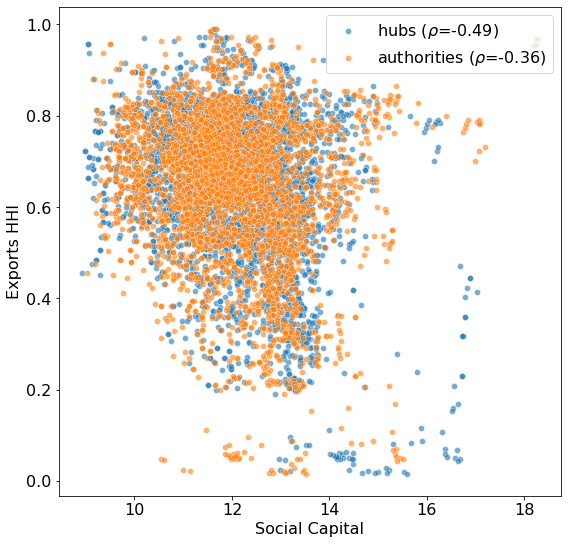

,centrality,goods pearson,goods p-value pearsonr,goods spearman,goods p-value spearman
0,hubs,-0.486951,1.407133e-225,-0.539211,9.445130e-286
1,authorities,-0.357856,3.244019e-115,-0.444403,9.187129e-184
2,favor,-0.325754,1.140734e-94,-0.355916,6.646122e-114


In [4]:
network = 'financial'
network = 'human'
network = 'goods'

plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(9,9))

for nc in all_centralities:
    
    n, c = nc.split('_')
    if network == n:
        sns.scatterplot(df[nc], 
                    y = df['financial_hhi'], 
                    ax=ax, 
                    label = c, 
                    alpha = 0.6)
    
plt.xlabel('Social Capital')
plt.ylabel('Exports HHI')

plt.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
for i, l in enumerate(L_labels):
    centrality = l.get_text()
    corr = pearsonr(df[f'{network}_hhi'], df[f'{network}_' + centrality])[0]
    text = centrality + f' ($\\rho$={round(corr,2)})'
    L_labels[i].set_text(text)

save_to = os.path.join(Path(os.getcwd()).parent.resolve(), 'reports', 'figures', f'{network}_social_capital_vs_diversification.png')
plt.savefig(save_to)    
plt.show()

df_correlations = pd.DataFrame({'centrality':centralities})

df_correlations[f'{network} pearson'], df_correlations[f'{network} p-value pearsonr'] = zip(*df_correlations.centrality.map(lambda x: pearsonr(df[f'{network}_hhi'], df[f'{network}_'+x])))
df_correlations[f'{network} spearman'], df_correlations[f'{network} p-value spearman'] = zip(*df_correlations.centrality.map(lambda x: spearmanr(df[f'{network}_hhi'], df[f'{network}_'+x])))

df_correlations